<a href="https://colab.research.google.com/drive/1lqhbw-f8mWwTqVbW3dtat4bYaDItYGUC?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulando Datos con Pandas

<img align="middle" src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" alt="crispdm" width="300"/>

Hoy trabajaremos con datos de [OpenFlights](https://openflights.org/data.html), para realizar una introducción a Pandas que recopilará los básicos de esta librería. El ***repositorio*** del proyecto es [éste](https://github.com/jpatokal/openflights).

Antes que nada, lo primero que tenemos que hacer para poder utilizar Pandas es importar la librería en nuestro código.

In [1]:
import pandas as pd


## Lectura de Datos

Empecemos por el principio: vamos a traer los datos que necesitamos para trabajar, mediante la lectura de dos archivos CSV:

* Rutas
* Aeropuertos

Los datos son traídos desde el repositorio de la página [OpenFlights](https://openflights.org/).

![of](https://i0.wp.com/openflights.org/demo/map-political.png)


In [5]:
url_rutas = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat'
rutas = pd.read_csv(url_rutas, header=None)
rutas

,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


Como habrán podido notar, los títulos de las columnas se corresponden con números. Esto es porque los datos no incluyen encabezado, entonces al especificarle **`header=None`** Pandas automáticamente coloca números como nombres de columnas.

Lo mismo ocurre al leer los datos de aeropuertos:


In [6]:
url_aeropuertos = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
aeropuertos = pd.read_csv(url_aeropuertos, header=None)
aeropuertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


Como conocemos los nombres de las columnas (consultar [metadata](https://openflights.org/data.html)), podemos hacer lo siguiente para que en la lectura se incluyan estos nombres:

In [9]:
# Definimos una lista con los nombres de las columnas en el orden de la metadata
cols_rutas = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
              'Destination Airport', 'Destination Airport ID', 'Codshare',
              'Stops', 'Equipment']

In [10]:
rutas.columns=cols_rutas

In [12]:
cols_aeropuertos = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO',
                    'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST',
                    'Tz database time zone', 'Type', 'Source']

In [26]:
aeropuertos = pd.read_csv(url_aeropuertos, names=cols_aeropuertos)
aeropuertos.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


Vamos a explorar un poco estos objetos que acabamos de crear, respondiendo preguntas como:
- ¿Qué son?
- ¿Qué contienen?
- ¿Qué propiedades tienen?
- ¿Qué podemos hacer con ellos?

In [ ]:
# Qué contienen estos objetos?
rutas.dtypes

In [ ]:
# Cuántas filas y columnas tienen?
print(rutas.shape)

Una propiedad muy importante de los **DataFrames** es que están compuestos por filas y columnas, como una tabla de doble entrada. Estos elementos constituyen ***atributos*** de los mismos y se denominan ***índice*** y ***columnas***.

In [ ]:
print(rutas.index)
print(rutas.columns)

In [ ]:
# Obtener una muestra aleatoria
rutas.sample(5)

# Seleccion de columnas y filas

Para seleccionar una columna, lo que hacemos es utilizar un par de **`[]`** luego del nombre del DataFrame y dentro de estos le pasamos entre comillas (dobles o simples) el nombre de la columna indicada. Por ejemplo:

In [14]:
rutas['Source Airport ID']

0        2965
1        2966
2        2966
3        2968
4        2968
         ... 
67658    6334
67659    4029
67660    2912
67661    2912
67662    2913
Name: Source Airport ID, Length: 67663, dtype: object

Intentemos ahora cambiar el tipo de esta columna:


In [15]:
rutas['Source Airport ID'].astype(int)

ValueError: ignored

Cuando intentamos hacer esto, surge un error de tipo `ValueError`. Parece que la transformación a **`int`** falla al encontrarse con un caracter que no es numérico (`'\\N'`).

 ¿ Cómo podemos calcular la cantidad de filas en esta columna que contienen el caracter `'\\N'`?
 
 ¿Cómo hacemos a calcular qué proporción de filas tienen en esta columna en particular un dato no numérico?

In [16]:
(rutas['Source Airport ID'] == '\\N').sum()

220

En este caso, identificamos un dato no numérico específico, pero podríamos tener otros casos de datos no numéricos. Probemos utilizando el método de strings **`isnumeric()`**.

In [17]:
print(rutas['Source Airport ID'].str.isnumeric().head(5))
(rutas['Source Airport ID'].str.isnumeric()).sum()

0    True
1    True
2    True
3    True
4    True
Name: Source Airport ID, dtype: bool


67443

Podemos calcular también la cantidad de datos no numéricos

In [18]:
(~rutas['Source Airport ID'].str.isnumeric()).sum()

220

Para quedarnos con el dataset filtrado, podemos crear una máscara, donde los valores ne la rutas sean datos numéricos

In [24]:
rutas_filtradas = rutas[rutas['Source Airport ID'].str.isnumeric()]
print('Shape rutas          ', rutas.shape)
print('Shape rutas_filtradas', rutas_filtradas.shape)
print('Filas eliminadas        ', rutas.shape[0]-rutas_filtradas.shape[0])

Shape rutas           (67663, 9)
Shape rutas_filtradas (67443, 9)
Filas eliminadas         220


## Operaciones y Estadísticas Sobre los Datos de un **`DataFrame`**


Veamos algunas operaciones que podemos realizar con DataFrames y cómo obtener estadísticas sobre los datos.

¿Cuántas rutas tienen como origen a cada aeropuerto o cuántas rutas salen de cada aeropuerto? Esto se traduce en obtener la frecuencia del `Source Airport`, para lo que usaremos el método **`value_counts()`**.

In [21]:
# Cantidad de aeropuertos de salidas 
print(rutas['Source Airport'].nunique())

# Frecuencia de aeropuerto de salida
print(rutas['Source Airport'].value_counts())

3409
ATL    915
ORD    558
PEK    535
LHR    527
CDG    524
      ... 
PPG      1
BLD      1
GCW      1
PRI      1
WYA      1
Name: Source Airport, Length: 3409, dtype: int64


Sin embargo, para tener más claros cuáles son estos aeropuertos, sería bueno tener su nombre y no su código. Para esto, podemos **unir los DataFrames**, utilizando el método **`.merge()`**

In [28]:
rutas.columns
display(rutas.head(2))

aeropuertos.columns
display(aeropuertos.head(2))

,Airline,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2


,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports


In [29]:
# Unión de DataFrames
rutas_por_aerop_salida = rutas_filtradas.merge(aeropuertos,
                                               left_on = ['Source Airport ID'],
                                               right_on = ['Airport ID'])
print(rutas_filtradas.shape)
print(rutas_por_aerop_salida.shape)
rutas_por_aerop_salida.head()

ValueError: ignored

Aquí tenemos un error por tratar de "juntar" dos tipos de datos distintos, para poder llevar a cabo el merge "transformemos" los datos

In [32]:
rutas_filtradas['Source Airport ID'] = rutas_filtradas['Source Airport ID'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
# Unión de DataFrames
rutas_por_aerop_salida = rutas_filtradas.merge(aeropuertos,
                                               left_on = ['Source Airport ID'],
                                               right_on = ['Airport ID'])
print(rutas_filtradas.shape)
print(rutas_por_aerop_salida.shape)
rutas_por_aerop_salida.head()

(67443, 9)
(67180, 23)


,Airline,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codshare,Stops,Equipment,Airport ID,...,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,2965,...,AER,URSS,43.449902,39.9566,89,3,N,Europe/Moscow,airport,OurAirports
1,7J,9531,AER,2965,DYU,2979,NaN,0,735,2965,...,AER,URSS,43.449902,39.9566,89,3,N,Europe/Moscow,airport,OurAirports
2,9U,1073,AER,2965,KIV,1735,NaN,0,EM2,2965,...,AER,URSS,43.449902,39.9566,89,3,N,Europe/Moscow,airport,OurAirports
3,B2,1478,AER,2965,MSQ,2954,NaN,0,735 CRJ,2965,...,AER,URSS,43.449902,39.9566,89,3,N,Europe/Moscow,airport,OurAirports
4,HY,5281,AER,2965,TAS,2983,NaN,0,767,2965,...,AER,URSS,43.449902,39.9566,89,3,N,Europe/Moscow,airport,OurAirports


Ahora podemos ver las salidas por los nombres de los aeropuertos

In [34]:
# Frecuencia de aeropuerto de salida por nombre
rutas_por_aerop_salida['Name'].value_counts().head(10)

Hartsfield Jackson Atlanta International Airport    915
Chicago O'Hare International Airport                558
Beijing Capital International Airport               535
London Heathrow Airport                             527
Charles de Gaulle International Airport             524
Frankfurt am Main Airport                           497
Los Angeles International Airport                   492
Dallas Fort Worth International Airport             469
John F Kennedy International Airport                456
Amsterdam Airport Schiphol                          453
Name: Name, dtype: int64

Y cómo podemos mantener tanto el código como el nombre al realizar este conteo? Para ello utilizaremos un método que nos permite agrupar por muchas claves, **`.groupby()`**. Veamos cómo se utiliza:

In [ ]:
# dataset
rutas_por_aerop_salida

In [39]:
salidas_por_aerop = rutas_por_aerop_salida.groupby(
    by = ['Source Airport', 'Name'],
    as_index = False
    )['Airline'].count().sort_values(['Airline'],  ascending = False)

In [40]:
salidas_por_aerop

,Source Airport,Name,Airline
161,ATL,Hartsfield Jackson Atlanta International Airport,915
2003,ORD,Chicago O'Hare International Airport,558
2067,PEK,Beijing Capital International Airport,535
1530,LHR,London Heathrow Airport,527
449,CDG,Charles de Gaulle International Airport,524
...,...,...,...
2370,SDE,Vicecomodoro Angel D. La Paz Aragonés Airport,1
2372,SDG,Sanandaj Airport,1
824,FJR,Fujairah International Airport,1
2382,SDY,Sidney - Richland Regional Airport,1


Analicemos sólo los aeropuertos de países que tengan al menos 1000 rutas con origen en esos países. Para ello, obtendremos una lista de países que luego filtraremos en nuestro DataFrame.

In [41]:
# Países con mayor tráfico
salidas_por_pais = rutas_por_aerop_salida['Country'].value_counts()
salidas_por_pais

United States              13100
China                       8212
United Kingdom              2663
Spain                       2531
Germany                     2352
                           ...  
Swaziland                      1
Falkland Islands               1
American Samoa                 1
Cocos (Keeling) Islands        1
Tuvalu                         1
Name: Country, Length: 225, dtype: int64

In [42]:
# seleccionemos los paíces que tienen más de 1000 salidas
paises_mayor_trafico = salidas_por_pais > 1000

In [44]:
# Rutas de países con mayor tráfico
mascara_paises = rutas_por_aerop_salida['Country'].isin(paises_mayor_trafico.index)

aeropuertos_mayor_trafico = rutas_por_aerop_salida[mascara_paises]

aeropuertos_mayor_trafico.head(2)

,Airline,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codshare,Stops,Equipment,Airport ID,...,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,2965,...,AER,URSS,43.449902,39.9566,89,3,N,Europe/Moscow,airport,OurAirports
1,7J,9531,AER,2965,DYU,2979,NaN,0,735,2965,...,AER,URSS,43.449902,39.9566,89,3,N,Europe/Moscow,airport,OurAirports


¿Cómo hacemos para obtener la cantidad de rutas que parten de cada país y ciudad? 

Resolver esto como ejercicio usando .groupby()


Analicemos los vuelos que parten de ciudades brasileras únicamente.

In [46]:
# selecciono salidas desde Brazil
salidas_brasil = rutas_por_aerop_salida[rutas_por_aerop_salida["Country"]=="Brazil"]
# agrupamos por ciudad
salidas_brasil = salidas_brasil.groupby(['City'])['Airline'].count().to_frame()
# ordenamos el resultado por la cantidad de aerolineas
salidas_brasil.sort_values(by='Airline', ascending=False)

,Airline
City,
Sao Paulo,240
Rio De Janeiro,128
Brasilia,98
Belo Horizonte,68
Salvador,58
...,...
Redencao,1
Coari,1
Rio Verde,1


In [47]:
# Cambiemos el nombre de la columna para poder hacer merge más tarde
salidas_brasil.rename(columns= {"Airline": "Salidas"}, inplace=True)
salidas_brasil

,Salidas
City,
Alta Floresta,1
Altamira,4
Aracaju,13
Aracatuba,2
Araguaina,4
...,...
Uberlandia,15
Uruguaiana,1
Vilhena,1


Podemos hacer lo mismo con los datos de llegada y unirlos con los de salida.


In [48]:
# Filtramos aquellos para los cuales el ID no tiene sentido
filas_con_id_numerico = rutas['Destination Airport ID'].str.isnumeric()
rutas_filtradas = rutas[filas_con_id_numerico]
rutas_filtradas['Destination Airport ID'] = rutas_filtradas['Destination Airport ID'].astype(int)

# Frecuencia de aeropuerto de llegada por nombre
rutas_por_aerop_llegada = rutas_filtradas.merge(aeropuertos,
                                               left_on = ['Destination Airport ID'],
                                               right_on = ['Airport ID'])

rutas_por_aerop_llegada['Name'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Hartsfield Jackson Atlanta International Airport    911
Chicago O'Hare International Airport                550
Beijing Capital International Airport               534
London Heathrow Airport                             524
Charles de Gaulle International Airport             517
                                                   ... 
Gobernador Castello Airport                           1
Vicecomodoro Angel D. La Paz Aragonés Airport         1
Termas de Río Hondo international Airport             1
Resistencia International Airport                     1
Grafton Airport                                       1
Name: Name, Length: 3202, dtype: int64

In [49]:
# Número de vuelos por aeropuerto de llegada
llegadas_por_pais = rutas_por_aerop_llegada.groupby(
    by = ['Country', 'Name','City'], as_index=False)['Airline'].count()
llegadas_por_pais

,Country,Name,City,Airline
0,Afghanistan,Hamid Karzai International Airport,Kabul,26
1,Afghanistan,Herat Airport,Herat,6
2,Afghanistan,Kandahar Airport,Kandahar,5
3,Afghanistan,Mazar I Sharif Airport,Mazar-i-sharif,4
4,Albania,Tirana International Airport Mother Teresa,Tirana,36
...,...,...,...,...
3208,Zambia,Mfuwe Airport,Mfuwe,1
3209,Zambia,Simon Mwansa Kapwepwe International Airport,Ndola,10
3210,Zimbabwe,Joshua Mqabuko Nkomo International Airport,Bulawayo,4
3211,Zimbabwe,Robert Gabriel Mugabe International Airport,Harare,31


Veamos ahora las llegadas por ciudad de Brasil

In [50]:
llegadas_brasil = llegadas_por_pais[llegadas_por_pais["Country"] == "Brazil"]

llegadas_brasil = llegadas_brasil.groupby(['City'])['Airline'].sum().to_frame('Llegadas')

llegadas_brasil

,Llegadas
City,
Alta Floresta,1
Altamira,3
Aracaju,13
Aracatuba,2
Araguaina,4
...,...
Uberlandia,15
Uruguaiana,1
Vilhena,1


In [52]:
trafico_brasil = salidas_brasil.merge(llegadas_brasil, on='City', how='left')

In [53]:
trafico_brasil.head()

,Salidas,Llegadas
City,,
Alta Floresta,1,1.0
Altamira,4,3.0
Aracaju,13,13.0
Aracatuba,2,2.0
Araguaina,4,4.0


¿Existe alguna relación entre la cantidad de salidas y llegadas en cada ciudad de Brasil? Podemos hacer una visualización para tener una idea de la relación.

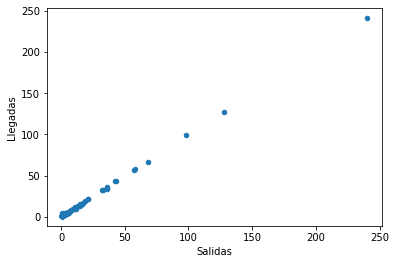

In [54]:
trafico_brasil.plot.scatter("Salidas", "Llegadas")

Veamos algunos estadísticos sobre este DataFrame, utilizando el método **`.describe()`**

In [55]:
trafico_brasil.describe()

,Salidas,Llegadas
count,116.000000,114.000000
mean,12.008621,12.184211
std,28.379569,28.624999
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,11.000000,10.000000
max,240.000000,241.000000


Creemos una nueva columna para analizar cuáles son las ciudades con mayor 
diferencia entre salidas y llegadas. Para ello, calculemos el % de salidas sobre llegadas.

In [56]:
trafico_brasil['Diferencia'] = (trafico_brasil['Salidas'] / trafico_brasil['Llegadas']).round(2)
trafico_brasil.sort_values(by='Diferencia', ascending=False)

,Salidas,Llegadas,Diferencia
City,,,
Campos,4,3.0,1.33
Pelotas,4,3.0,1.33
Altamira,4,3.0,1.33
Maraba,12,10.0,1.20
Santarem,15,13.0,1.15
...,...,...,...
Ourilandia do Norte,1,2.0,0.50
Patos de Minas,1,2.0,0.50
Oriximina,1,4.0,0.25


Vemos que tenemos dos ciudades sin llegadas. Podemos completar esos valores nulos con 0, usando el método **`.fillna()`**

In [57]:
trafico_brasil['Llegadas'] = trafico_brasil['Llegadas'].fillna(0)
trafico_brasil

,Salidas,Llegadas,Diferencia
City,,,
Alta Floresta,1,1.0,1.00
Altamira,4,3.0,1.33
Aracaju,13,13.0,1.00
Aracatuba,2,2.0,1.00
Araguaina,4,4.0,1.00
...,...,...,...
Uberlandia,15,15.0,1.00
Uruguaiana,1,1.0,1.00
Vilhena,1,1.0,1.00


## Ejercicios de Práctica

1. Utilizando el DataFrame `rutas_por_aerop_salida`, crear una nueva columna, a la que deberán llamar `Source Airport Name`, a partir de las columnas `Source Airport` y `Name`, que contenga primero las tres siglas que identifican a un aeropuerto y luego el nombre, separado por `' - '`, es decir, algo como `XXX - Aeropuerto Random`.

2. Obtener una nueva columna, a la que deberán llamar  a partir del primer elemento que se obtiene al hacer un *split* por el caracter `'/'` sobre la columna `Tz database time zone`.

## Visualización

Comencemos con la importación de seaborn y matplotlib.pyplot

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# Acomodemos un poco los datos a visualizar

plot_data = salidas_por_aerop.head(100)
plot_data.rename(columns={'Airline':'Salidas'}, inplace=True)
plot_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Source Airport,Name,Salidas
161,ATL,Hartsfield Jackson Atlanta International Airport,915
2003,ORD,Chicago O'Hare International Airport,558
2067,PEK,Beijing Capital International Airport,535
1530,LHR,London Heathrow Airport,527
449,CDG,Charles de Gaulle International Airport,524
...,...,...,...
1521,LGA,La Guardia Airport,158
1062,HND,Tokyo Haneda International Airport,157
587,CUN,Cancún International Airport,157
96,ALC,Alicante International Airport,157


### Graficos de barras

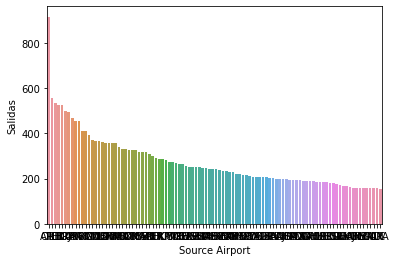

In [61]:
# primer grafico de cantidad de salidas por aeropeurto
sns.barplot(x=plot_data['Source Airport'], y=plot_data['Salidas'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

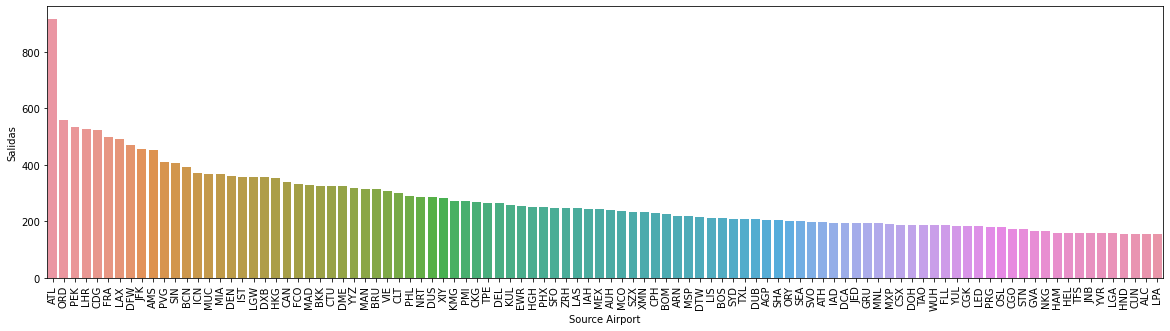

In [64]:
# para cambiar el tamaño de la imágen
fig, ax = plt.subplots(figsize=(20, 5))
# grafico de barras
sns.barplot(x=plot_data['Source Airport'], y=plot_data['Salidas'])
# rotamos las etiquetas
plt.xticks(rotation=90)

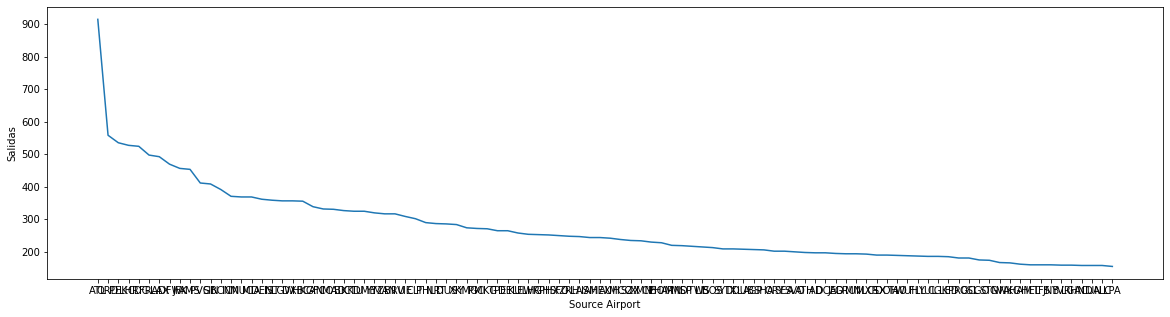

In [66]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=plot_data, x='Source Airport', y='Salidas')
plt.xticks(rotation=90)

### Gráficos de Dispersión (Scatter)

(-197.86839904745, 197.94240417445, -98.975, 98.475)

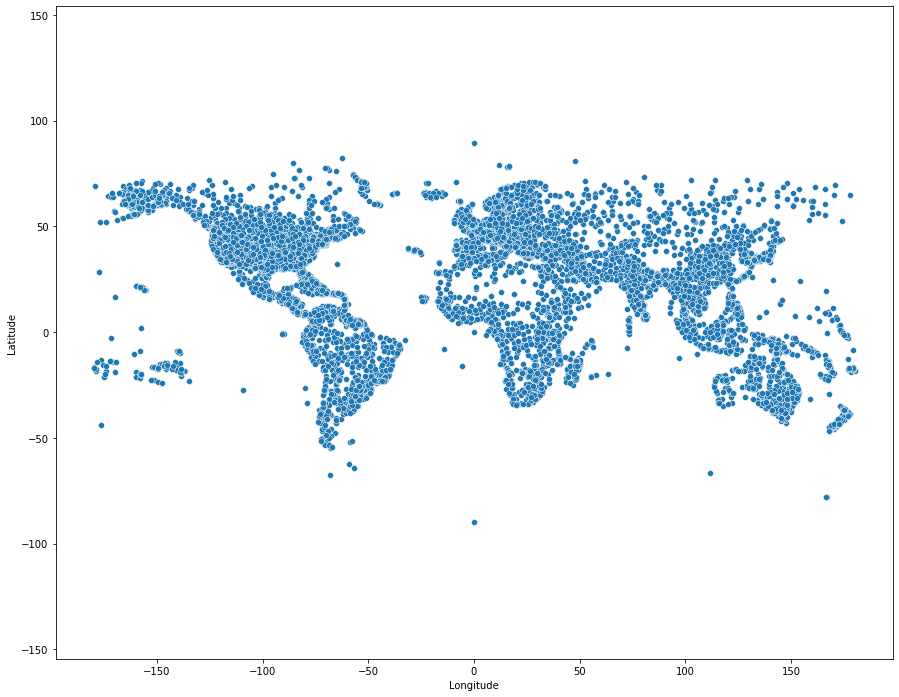

In [71]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.scatterplot(x=aeropuertos['Longitude'], y=aeropuertos['Latitude'])
plt.axis("equal")

## Gráficos de Distribución

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


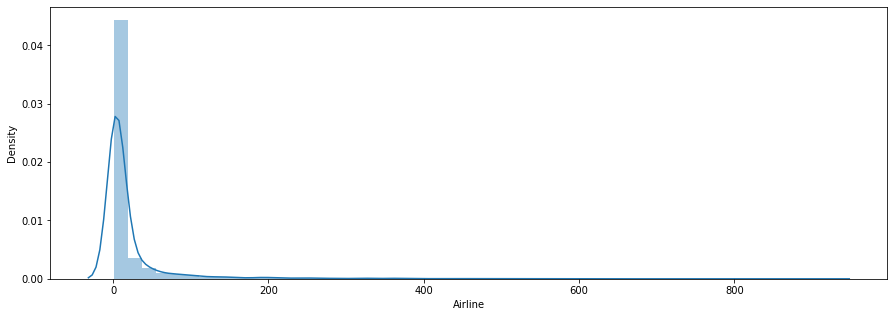

In [74]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(salidas_por_aerop['Airline'])